<a href="https://colab.research.google.com/github/sohels984/sohels984/blob/main/customer_personality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv
/kaggle/input/customer-personality-analysis1/Customer Personality Analysis.xls


In [ ]:
!pip install openpyxl
!pip install xlrd

In [ ]:
df = pd.read_excel("/kaggle/input/customer-personality-analysis1/Customer Personality Analysis.xls")

In [ ]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [ ]:
# CHEKING IS ANY NULL DATA IN ANY COLUMN.
df.isna().any(axis=0)

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [ ]:
# CHEKING HOW MANY DATA IS NULL AND IN WHICH COLUMN.
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# GETTING INFORMATION ABOUT OUR DATAFRAME.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# GETTING COLUMN NAME OF DATAFRAME.
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer']) # CONVERTING Dt_Customer VALUES INTO DATE-TIME FORMATE.

/tmp/ipykernel_32/521387761.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer']=pd.to_datetime(df['Dt_Customer']) # CONVERTING Dt_Customer VALUES INTO DATE-TIME FORMATE.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
# GETTING NUMERIC DATAS COUNT,MEAN,STANDARD DEVIATION,PERCENTILES, AND MAXIMUM VALUE OF DATASET.
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
import matplotlib.pyplot as plt

<Axes: >

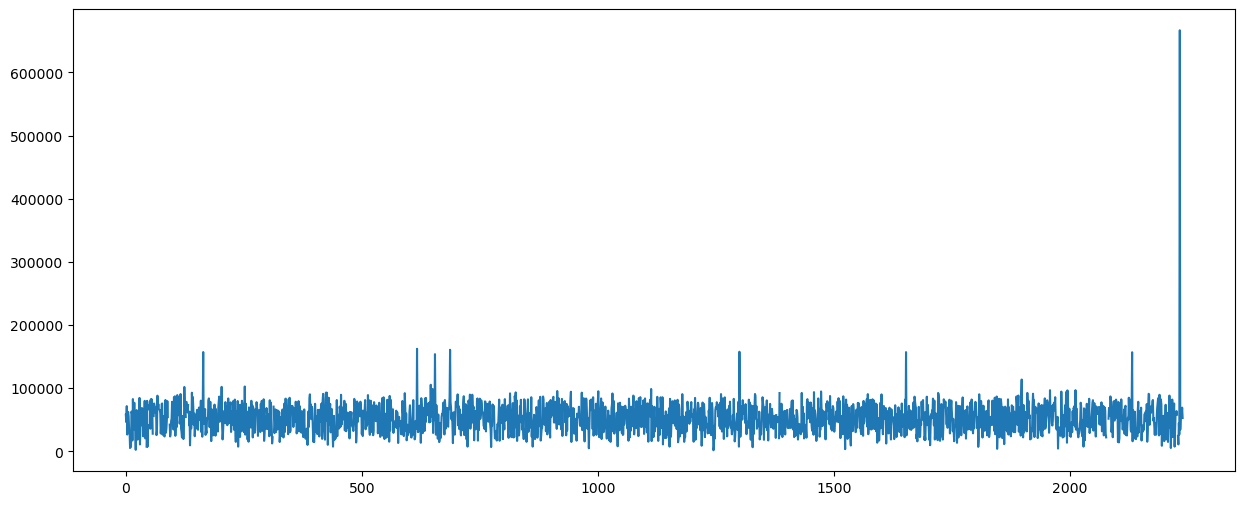

In [ ]:
# PLOTING INCOME COLUMN.
df.Income.plot(figsize=(15,6))

# AS PER VISUALISATION WE CLEARLY SEE THAT A VALUE FALLING ABOVE 6 LAKHS AND IT IS OUTLIER. FIRSTLY WE HAVE TO TREAT THAT.

In [ ]:
#getting second heighest number.
second_heighest=df['Income'].nlargest(2).iloc[-1]
second_heighest

162397.0

In [ ]:
df[df['Income']>162397]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
df.drop(2233,axis=0,inplace=True)

In [ ]:
# GETTING NUMERIC DATAS COUNT,MEAN,STANDARD DEVIATION,PERCENTILES, AND MAXIMUM VALUE OF DATASET AFTER REMOVING OUTLIER.
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2239.000000,2239.000000,2215.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.0,2239.0,2239.000000
mean,5590.444841,1968.802144,51969.861400,0.443948,0.506476,49.121036,304.067441,26.307727,167.016525,37.538633,...,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379,3.0,11.0,0.149174
std,3246.372471,11.985494,21526.320095,0.538390,0.544555,28.963662,336.614830,39.781468,225.743829,54.637617,...,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412,0.0,0.0,0.356339
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2827.500000,1959.000000,35284.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5455.000000,1970.000000,51373.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8423.500000,1977.000000,68487.000000,1.000000,1.000000,74.000000,504.500000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
a=df.groupby("Education")['Income'].transform('mean')
a

0       52169.749776
1       52169.749776
2       52169.749776
3       52169.749776
4       56145.313929
            ...     
2235    52169.749776
2236    56145.313929
2237    52169.749776
2238    52917.534247
2239    56145.313929
Name: Income, Length: 2239, dtype: float64

# By this code we are finding mean values by category of education also we are using transform('mean')In this code, transform is used because we want to propagate the result of a user-specified group-based operation back into the original DataFrame in a way that matches the size and order of the original data.

In [ ]:
# filing null values by the mean of each category.
df['Income']=df['Income'].fillna(a)

In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.0,2239.0,2239.000000
mean,5590.444841,1968.802144,51976.473452,0.443948,0.506476,49.121036,304.067441,26.307727,167.016525,37.538633,...,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379,3.0,11.0,0.149174
std,3246.372471,11.985494,21412.135064,0.538390,0.544555,28.963662,336.614830,39.781468,225.743829,54.637617,...,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412,0.0,0.0,0.356339
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2827.500000,1959.000000,35533.500000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5455.000000,1970.000000,51569.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8423.500000,1977.000000,68277.500000,1.000000,1.000000,74.000000,504.500000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2239 non-null   int64         
 1   Year_Birth           2239 non-null   int64         
 2   Education            2239 non-null   object        
 3   Marital_Status       2239 non-null   object        
 4   Income               2239 non-null   float64       
 5   Kidhome              2239 non-null   int64         
 6   Teenhome             2239 non-null   int64         
 7   Dt_Customer          2239 non-null   datetime64[ns]
 8   Recency              2239 non-null   int64         
 9   MntWines             2239 non-null   int64         
 10  MntFruits            2239 non-null   int64         
 11  MntMeatProducts      2239 non-null   int64         
 12  MntFishProducts      2239 non-null   int64         
 13  MntSweetProducts     2239 non-nul

In [ ]:
pl=df.groupby('Education')['Income'].mean()
pl

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52169.749776
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

<Axes: xlabel='Education'>

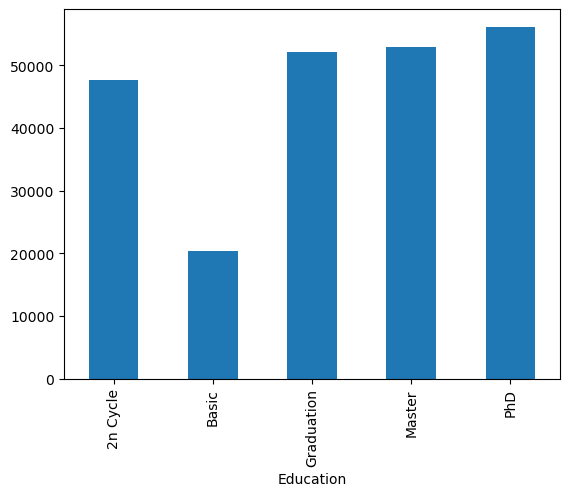

In [ ]:
pl.plot(kind='bar')

# HERE I FINISHED THE DATA CLEANING OF DATASET. IF WE NEEDE MORE CLEANING OR DATA WRANGLING FOR FURTHER WE WILL DO IT AT THE TIME OF ANSWERING THE QUESTION.

In [ ]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


# Q1 :- How many customer(s) Income is above 50000?

In [ ]:
df1=df[df['Income']>50000]
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1176 non-null   int64         
 1   Year_Birth           1176 non-null   int64         
 2   Education            1176 non-null   object        
 3   Marital_Status       1176 non-null   object        
 4   Income               1176 non-null   float64       
 5   Kidhome              1176 non-null   int64         
 6   Teenhome             1176 non-null   int64         
 7   Dt_Customer          1176 non-null   datetime64[ns]
 8   Recency              1176 non-null   int64         
 9   MntWines             1176 non-null   int64         
 10  MntFruits            1176 non-null   int64         
 11  MntMeatProducts      1176 non-null   int64         
 12  MntFishProducts      1176 non-null   int64         
 13  MntSweetProducts     1176 non-nul

In [ ]:
ab50=df1.groupby("Education")['Income'].count()
ab50

Education
2n Cycle       89
Graduation    600
Master        191
PhD           296
Name: Income, dtype: int64

In [ ]:
df.groupby("Education")['Income'].count()

Education
2n Cycle       203
Basic           54
Graduation    1126
Master         370
PhD            486
Name: Income, dtype: int64

<Axes: xlabel='Education'>

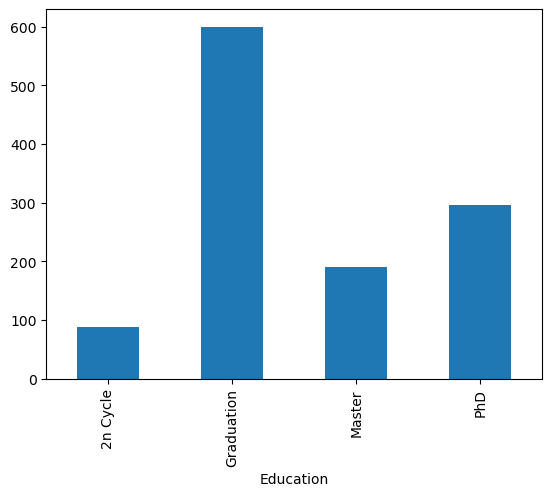

In [ ]:
ab50.plot(kind='bar')

# Ans1 :- There are 1176 customers found having Income more then 50,000. If we grouping the data by education, "Graduation" category having most >50000(51%) Income & "2n Cycle" category having minimum  >50000 (7.5%) income. Similarly, we get to know that most of the customers in the dataset belong to the graduate category.

# Q2 :- How much money was spent overall on wines and give it's percentage of overall spent money?

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df["Total_Revenue"]= df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,0,1,0,0,3,11,0,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,843


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_Revenue'],
      dtype='object')

In [ ]:
winesum=df.MntWines.sum()
winesum

680807

In [ ]:
revsum=df.Total_Revenue.sum()
revsum

1356926

In [ ]:
wine_spend=winesum/revsum*100
wine_spend.round(2)

50.17

In [ ]:
df.groupby("Marital_Status")['MntWines','Total_Revenue'].sum().sort_values(ascending=False, by='MntWines')

/tmp/ipykernel_32/2431434037.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Marital_Status")['MntWines','Total_Revenue'].sum().sort_values(ascending=False, by='MntWines')


,MntWines,Total_Revenue
Marital_Status,,
Married,258751,510453
Together,177950,352803
Single,138399,291112
Divorced,75364,141666
Widow,28434,56889
Absurd,711,2385
YOLO,644,848
Alone,554,770


# ANS 2 :- AS WE SEE THE TOTAL REVENUE IS 13,56,9626 & TOTAL WINE PRODUCT REVENUE IS 6,80,807. ITS 50% OF TOTAL REVENUE. ALSO WE OBSERVE THAT THE MARRIED CUSTOMER'S SPENDING ALMOST 50% OF THERE PURCHASE IN WINE PRODUCTS.(It is difficult to say that, whether these wine products are used by married persons together for enjoyment or to relieve the tension arising out of more responsibilities.)Whatever it may be, but from this data we come to know that our target consumer belongs to this married category.

# Q3 :- In which year is the maximum amount spent by customers?

In [ ]:
df["Year"]=df['Dt_Customer'].dt.year

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Revenue,Year
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,1617,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,27,2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,776,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,53,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,422,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,1341,2013
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,1,0,0,3,11,0,444,2014
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,1241,2014
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,843,2014


In [ ]:
df.groupby("Year")['Total_Revenue'].sum().sort_values(ascending=False)

Year
2013    715363
2012    368269
2014    273294
Name: Total_Revenue, dtype: int64

# ANS 3 :-  By the way, according to the data, the year 2013 shows the highest purchase record, but if we see the range of the data, then we come to know that the data is available only for 6 months of the year 2012 and 6 months of 2014, while the data of 12 months of 2013 is available. So we have to calculate half of the 2013 sales data or double the 2012 aer 2014 data. So the data will be like this
# * 2012-736538
# * 2013-715363
# * 2014-546588.
# Now according to this new data the year 2012 will be considered as the most purchased year with the sales value of 736538. And according to this we also come to know that the company's sales are decreasing year by year. Which needs to be seriously considered.

# Q4 :- Show the maximum revenue of income in which month and give the top 10 customer list of that month.

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_Revenue', 'Year'],
      dtype='object')

In [ ]:
df["Month"]=df['Dt_Customer'].dt.month_name()

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Revenue,Year,Month
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,1617,2012,April
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,27,2014,August
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,776,2013,August
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,53,2014,October
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,422,2014,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,1341,2013,June
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,1,0,0,3,11,0,444,2014,October
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,1241,2014,January
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,843,2014,January


In [ ]:
df.groupby("Month")['Total_Revenue'].sum().sort_values(ascending=False)

Month
August       131071
December     128366
November     125068
October      123555
February     121712
September    119231
January      117639
May          116467
March        106474
April         98489
June          90449
July          78405
Name: Total_Revenue, dtype: int64

In [ ]:
df2=df[df['Month']=='August']
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Revenue,Year,Month
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,27,2014,August
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,776,2013,August
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,0,0,0,0,3,11,0,169,2013,August
17,4939,1946,Graduation,Together,37760.0,0,0,2012-08-31,20,84,...,0,0,0,0,3,11,0,317,2012,August
20,9360,1982,Graduation,Married,37040.0,0,0,2012-08-08,41,86,...,0,0,0,0,3,11,0,316,2012,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,3,11,0,8,2013,August
2133,642,1980,Basic,Married,16005.0,1,0,2012-08-14,69,1,...,0,0,0,0,3,11,0,103,2012,August
2197,10722,1973,Graduation,Together,55593.0,0,1,2013-08-21,63,293,...,0,0,0,0,3,11,0,546,2013,August
2231,9817,1970,Master,Single,44802.0,0,0,2012-08-21,71,853,...,0,0,0,0,3,11,0,1049,2012,August


In [ ]:
top10=df2.nlargest(10,'Total_Revenue')
top10

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Revenue,Year,Month
1259,2147,1969,Graduation,Together,76653.0,0,0,2013-08-16,91,736,...,1,1,0,0,3,11,0,2279,2013,August
1010,5236,1979,Graduation,Together,77568.0,0,1,2012-08-25,30,1230,...,1,1,0,0,3,11,0,2194,2012,August
248,8867,1988,PhD,Married,67546.0,0,0,2012-08-31,90,864,...,0,0,0,0,3,11,0,2126,2012,August
1890,2747,1988,PhD,Married,67546.0,0,0,2012-08-31,90,864,...,0,0,0,0,3,11,0,2126,2012,August
1953,7919,1976,PhD,Together,72335.0,0,0,2012-08-13,2,1285,...,0,0,0,0,3,11,1,2092,2012,August
681,4910,1967,Graduation,Divorced,68743.0,0,0,2012-08-30,81,1132,...,0,0,0,0,3,11,0,2074,2012,August
76,1859,1972,Master,Married,75251.0,0,0,2012-08-27,34,721,...,0,0,0,0,3,11,1,1890,2012,August
1100,5538,1975,Graduation,Divorced,83829.0,0,0,2013-08-10,78,897,...,1,1,0,0,3,11,1,1862,2013,August
1265,3910,1975,Graduation,Divorced,83829.0,0,0,2013-08-10,78,897,...,1,1,0,0,3,11,1,1862,2013,August
1913,5831,1967,Graduation,Married,77870.0,0,1,2012-08-22,93,1017,...,0,1,0,0,3,11,1,1815,2012,August


# ANS 4 :- According to the available data, maximum purchases have been made in the month of August. Out of which the list of maximum 10 customers is as per above.

# Q5 :- How much is the total amount spent overall on wine, fruits, meat, fish, sweets, and gold also given percentage-wise?

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_Revenue', 'Year', 'Month'],
      dtype='object')

In [ ]:
df["Ext"]="sales"

# ANS 5(1) :- Total amount spend overall on wine, fruits, meat, fish, sweets, and gold.

In [ ]:
ttsl=df.groupby("Ext")["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"].sum()
ttsl

/tmp/ipykernel_32/2135602466.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ttsl=df.groupby("Ext")["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"].sum()


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Ext,,,,,,
sales,680807,58903,373950,84049,60620,98597


In [ ]:
total_sum = ttsl['MntWines']+ttsl['MntFruits']+ttsl['MntMeatProducts']+ttsl['MntFishProducts']+ttsl['MntSweetProducts']+ttsl['MntGoldProds'].sum()
total_sum

Ext
sales    1356926
dtype: int64

In [ ]:
data = {
    "Category_Name": ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"],
    "Total Sale": [680807, 58903, 373950, 84049, 60620, 98597],
}
ttsl1=pd.DataFrame(data)
ttsl1

,Category_Name,Total Sale
0,MntWines,680807
1,MntFruits,58903
2,MntMeatProducts,373950
3,MntFishProducts,84049
4,MntSweetProducts,60620
5,MntGoldProds,98597


# ANS 5(2) :- Percentage amount spend overall on wine, fruits, meat, fish, sweets, and gold.

In [ ]:
ttsl1["sales%"]=ttsl1["Total Sale"]/1356926*100
ttsl1

,Category_Name,Total Sale,sales%
0,MntWines,680807,50.172743
1,MntFruits,58903,4.340915
2,MntMeatProducts,373950,27.558614
3,MntFishProducts,84049,6.194074
4,MntSweetProducts,60620,4.467451
5,MntGoldProds,98597,7.266203


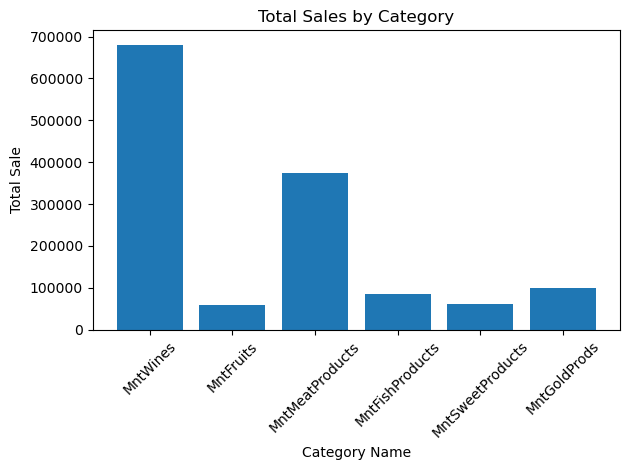

In [ ]:
plt.bar(ttsl1["Category_Name"], ttsl1["Total Sale"])

# Set labels and title
plt.xlabel("Category Name")
plt.ylabel("Total Sale")
plt.title("Total Sales by Category")

plt.xticks(rotation=45)
# tight_layout()This function helps to ensure that the plot's elements are properly spaced
#and there is enough padding around the plot to make it visually appealing.
plt.tight_layout()
plt.show()

# Q 6 :- Total amount spent every weekday in 2 years and it's in percentage


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_Revenue', 'Year', 'Month', 'Ext'],
      dtype='object')

In [ ]:
df["Day_Name"]=df["Dt_Customer"].dt.day_name()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Revenue,Year,Month,Ext,Day_Name
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,1617,2012,April,sales,Monday
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,27,2014,August,sales,Sunday
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,776,2013,August,sales,Wednesday
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,53,2014,October,sales,Thursday
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,422,2014,January,sales,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,1341,2013,June,sales,Thursday
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,3,11,0,444,2014,October,sales,Monday
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,1241,2014,January,sales,Saturday
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,843,2014,January,sales,Friday


In [ ]:
weekday_df=df[df["Day_Name"]!="Sunday"]
weekday_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Revenue,Year,Month,Ext,Day_Name
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,1617,2012,April,sales,Monday
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,776,2013,August,sales,Wednesday
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,53,2014,October,sales,Thursday
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,3,11,0,716,2013,September,sales,Monday
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,0,3,11,0,590,2012,November,sales,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,1341,2013,June,sales,Thursday
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,3,11,0,444,2014,October,sales,Monday
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,1241,2014,January,sales,Saturday
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,843,2014,January,sales,Friday


In [ ]:
weekday_sale= weekday_df.groupby("Day_Name")['Total_Revenue'].sum()
weekday_sale

Day_Name
Friday       209242
Monday       202253
Saturday     191531
Thursday     182832
Tuesday      181229
Wednesday    191951
Name: Total_Revenue, dtype: int64

<Axes: xlabel='Day_Name'>

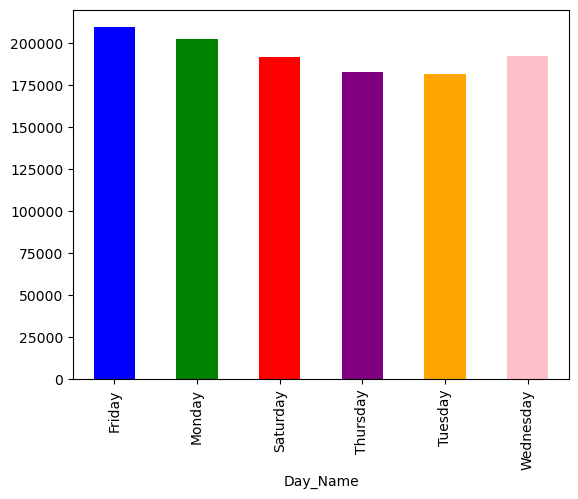

In [ ]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink']
weekday_sale.plot(kind='bar',color=colors)

In [ ]:
weekday_df.groupby("Ext")['Total_Revenue'].sum()

Ext
sales    1159038
Name: Total_Revenue, dtype: int64

# ANS 6(1) :- Total amount spent every weekday in 2 years.

In [ ]:
weekday_sale_p=pd.DataFrame(weekday_sale)
weekday_sale_p

,Total_Revenue
Day_Name,
Friday,209242
Monday,202253
Saturday,191531
Thursday,182832
Tuesday,181229
Wednesday,191951


# ANS 6(2) :- Percent amount spent every weekday in 2 years.

In [ ]:
weekday_sale_p["sales%"] = weekday_sale_p["Total_Revenue"]/1159038*100
weekday_sale_p

,Total_Revenue,sales%
Day_Name,,
Friday,209242,18.053075
Monday,202253,17.450075
Saturday,191531,16.524997
Thursday,182832,15.774461
Tuesday,181229,15.636157
Wednesday,191951,16.561234


In [ ]:
weekday_sale_p.reset_index(inplace=True)
weekday_sale_p

,Day_Name,Total_Revenue,sales%
0,Friday,209242,18.053075
1,Monday,202253,17.450075
2,Saturday,191531,16.524997
3,Thursday,182832,15.774461
4,Tuesday,181229,15.636157
5,Wednesday,191951,16.561234


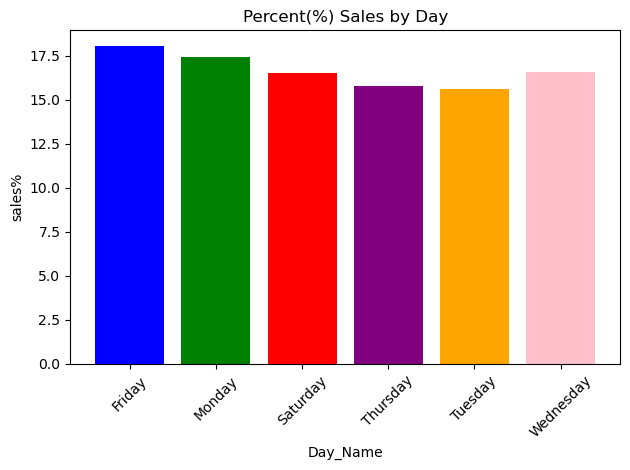

In [ ]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink']
plt.bar(weekday_sale_p["Day_Name"], weekday_sale_p["sales%"], color=colors)

# Set labels and title
plt.xlabel("Day_Name")
plt.ylabel("sales%")
plt.title("Percent(%) Sales by Day")

plt.xticks(rotation=45)
# tight_layout()This function helps to ensure that the plot's elements are properly spaced
#and there is enough padding around the plot to make it visually appealing.
plt.tight_layout()
plt.show()

# Analyzing this dataset, we find that the maximum number of consumers fall in the wine and meat categories, with 77% of our sales coming from these two categories. So we have to focus on both these categories. As we have seen that our sales are going down year after year.We have to find out what is the reason for this degrowth.
# ========================================================================================================================
# Question 1) Has there been a decrease in the purchasing power of the consumer?
# Answer :- No, it is not so because when we look at the GDP of the country, it increases continuously from the year 2012 to 2014.
# Question 2) Has the rate of inflation increased from 2012 to 2014 due to which the purchasing power of our consumers has been reduced?
# Answer 2) No it is not so, because the inflation rate has decreased from 3.35% in 2013 to 2014, increasing by 0.54% in 2012 to 2013.
# Question 3) Have we neglected any of these departments like Adequate Advertisement for Sales, Consumer Complaints and Delivery Time?
# Question 4) Have we taken adequate steps to take the feedback from the customers regarding the products and improve them?
# Question 5) Have we included some new products in our sales or have we tried to sell with the same old products continuously?
# Question 6) Have we tried to change our sales pattern according to festivals, seasons, trends?
# Question 7) Have we tried to run discounts, coupons, lucky draws or other types of offers on our products like other sales firms?
# It is necessary to study these questions from 3 to 7 deeply, so that we can take our falling sales up year after year.

#